In [1]:
from PyFlyt.core.drones import Rocket
import numpy as np

import gymnasium
import PyFlyt.gym_envs

from stable_baselines3 import DQN, PPO, SAC
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib import TQC
from matplotlib import pyplot as plt
from pathlib import Path
from sb3_contrib import RecurrentPPO


In [13]:
model_path = "./tqc_best/TQC_best_model.zip"

model = TQC.load(model_path)


In [14]:
# Render the environment
env = gymnasium.make("PyFlyt/Rocket-Landing-v1", render_mode="human")

obs, info = env.reset()
terminated, truncated = False, False
angular_velocity = []
lin_vel = []

# done = False
while not (terminated or truncated):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    angular_velocity.append(obs[:3])
    lin_vel.append(obs[6:9])

print(f'terminated : {terminated}\nturncated : {truncated}')
print(info)
    # env.render()

                             
terminated : True
turncated : False
{'out_of_bounds': True, 'fatal_collision': False, 'env_complete': False}


In [15]:
env.close()

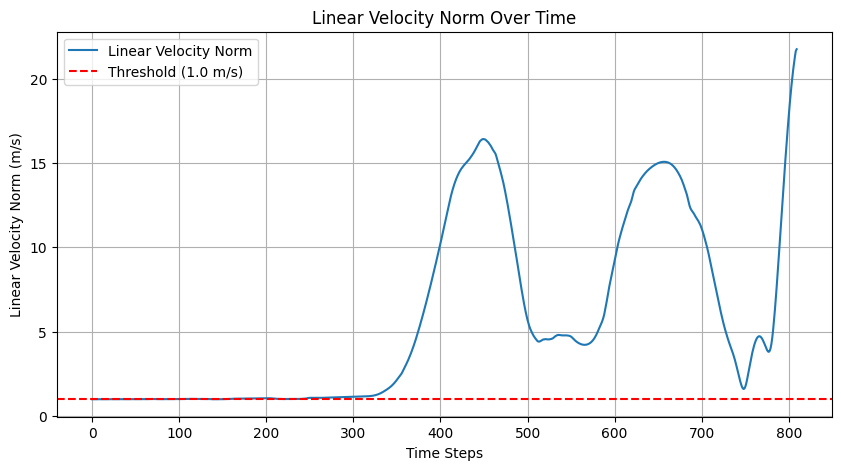

In [12]:
# Create a plot
norm_lin_vel = [np.linalg.norm(val) for val in lin_vel]

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, len(norm_lin_vel)), norm_lin_vel, label='Linear Velocity Norm')
plt.axhline(y=1.0, color='r', linestyle='--', label='Threshold (1.0 m/s)')
plt.title('Linear Velocity Norm Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Linear Velocity Norm (m/s)')
plt.legend()
plt.grid(True)
plt.show()

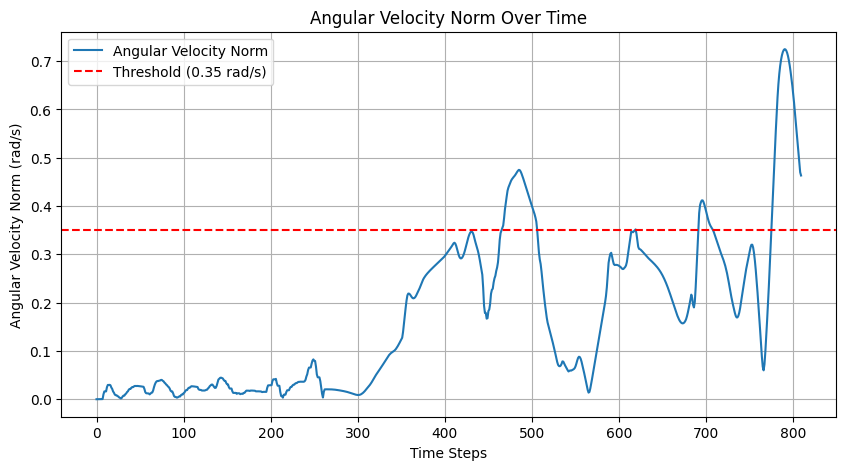

In [11]:
# Create a plot
norm_val_list = [np.linalg.norm(val) for val in angular_velocity]
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, len(norm_val_list)), norm_val_list, label='Angular Velocity Norm')
plt.axhline(y=0.35, color='r', linestyle='--', label='Threshold (0.35 rad/s)')
plt.title('Angular Velocity Norm Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Angular Velocity Norm (rad/s)')
plt.legend()
plt.grid(True)
plt.show()